# 11. Implementataion of Linear Regression by using Ordinary Least Square Method and Gradient Decent Method

## Best fitted curve by using the Ordinary Least Square Method
### Ordinary Least Squares (OLS) Algorithm

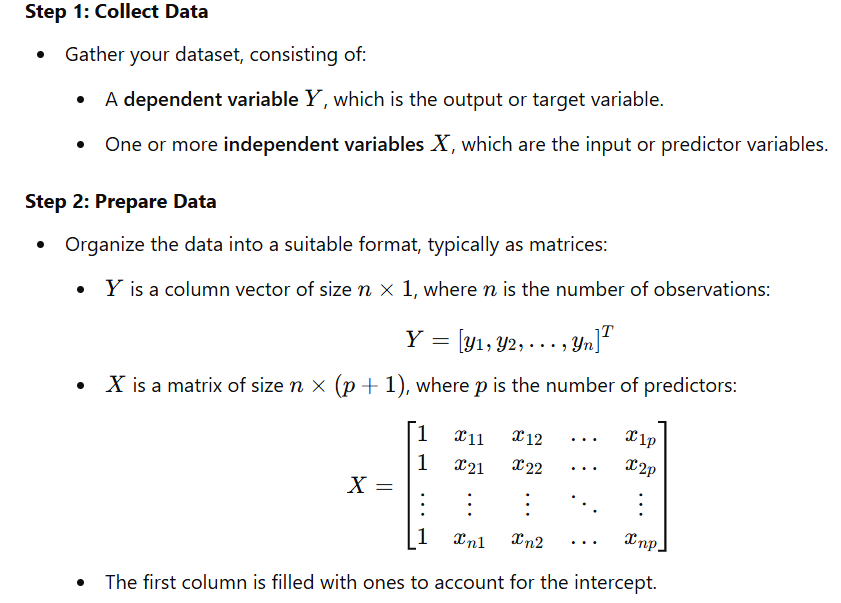

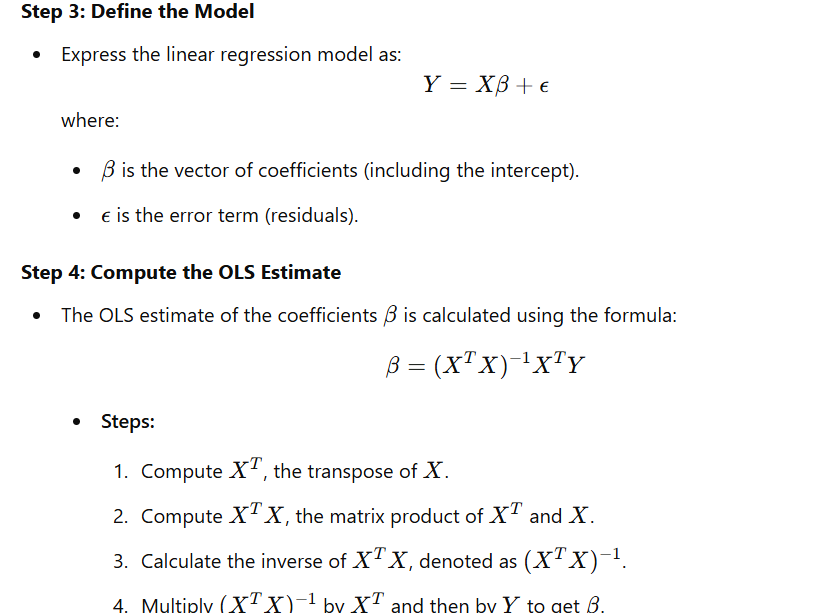

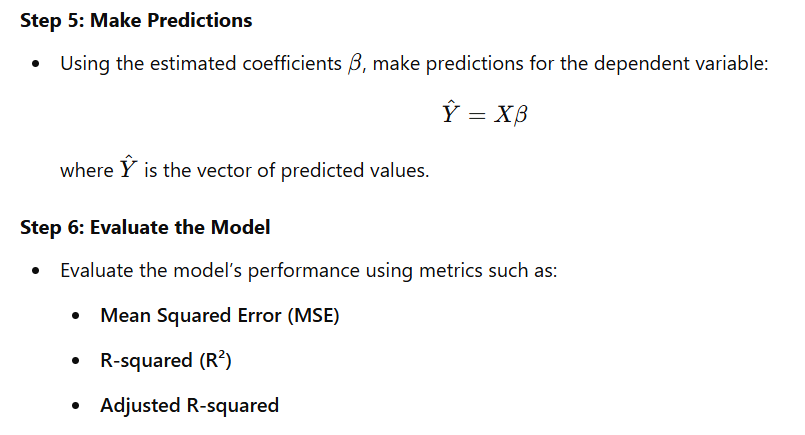

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
no_of_data_points = 13
m = no_of_data_points

In [3]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

In [4]:
len(x) == len(y) == 13

True

In [5]:
x_mean = np.mean(x)
y_mean = np.mean(y)
print(x_mean, y_mean)

7.615384615384615 89.76923076923077


In [6]:
def OLSM(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_var =[]
    cov_xy =[]
    for i in range(0,m):
        cov_xy.append((x[i] - x_mean)*(y[i] - y_mean))
        x_var.append((x[i] - x_mean)**2)
    cov =np.sum(cov_xy)
    var =np.sum(x_var)
    slope =cov/var
    intercept =y_mean - slope*x_mean
    return(slope, intercept)

In [7]:
slope, intercept = OLSM(x,y)

In [8]:
slope

-1.7512877115526122

In [9]:
intercept

103.10596026490066

In [10]:
def BestFittedCurve(x,slope,intercept):
    return(x*slope + intercept)

In [11]:
y_pred =[]
for i in range(0,m):
    y_pred.append(BestFittedCurve(x[i], slope, intercept))
y_pred

[94.3495217071376,
 90.84694628403237,
 89.09565857247976,
 90.84694628403237,
 99.60338484179543,
 73.33406916850625,
 99.60338484179543,
 87.34437086092714,
 96.1008094186902,
 83.84179543782193,
 82.09050772626931,
 87.34437086092714,
 92.59823399558499]

In [12]:
def SSE(y,y_pred):
    error = 0
    temp = []
    for i in range(0,m):
        temp.append((y[i] - y_pred[i])**2)
    error = np.sum(temp)
    return error

In [13]:
SSE(y,y_pred)

473.0669610007361

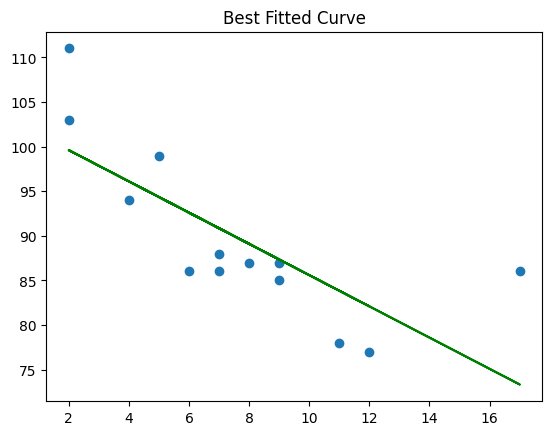

In [14]:
plt.plot(x,y_pred, 'green')
plt.title('Best Fitted Curve')
plt.scatter(x,y)
plt.show()

### Algorithom For Linear Regrassion with Gradient Decent

#### Step1 : Initialize Parameters
1)Set the initial value for the slope and the intercept
2)Define a learning rate lr 
#### Step2 : Compute Cost
The cost function is 

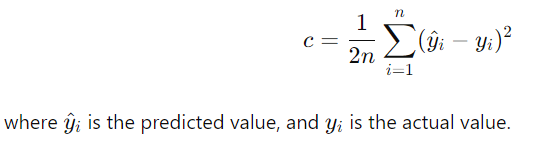

#### Step3 : Prediction Function
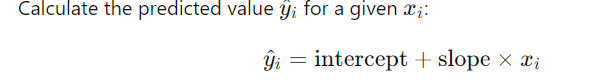

#### Step4 : Compute Gradients
Compute the gradients of the cost function with repect to slope and intercept:    

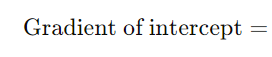 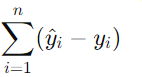

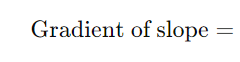 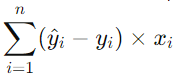

#### Step5 : Update Parameters
Use the gradients to update the value of slope and intercept :
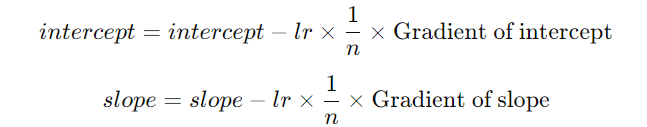

#### Step6: Iterate
Repeat step3 to step5 for fixed bnumber of iterations.
#### Step7: Output
After the completion of iterations, return the final values of slope and intercept

#### Calculate R-Squared
To evaluate the performance of the model, compute the R-squared value, which indicates how well the line fits the data
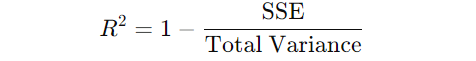

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

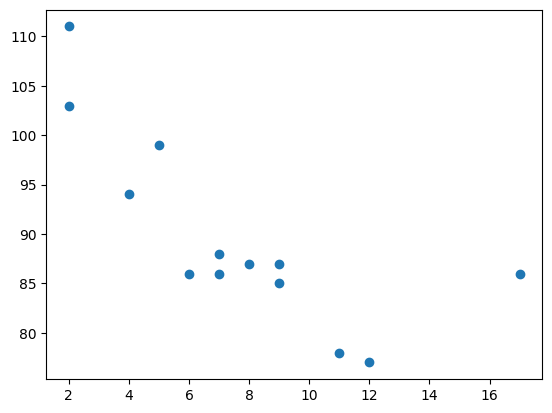

In [17]:
plt.scatter(x,y)
plt.show()

In [18]:
def ypred(slope,intercept,x):
    yp=intercept+x*slope
    return yp

In [19]:
def cost(x,y,sl,inter):
    n=len(x)
    sum=0
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])**2
    c=0.5*sum/n
    return c
    

In [20]:
def errinter(x,y,sl,inter):
    sum=0
    n=len(x)
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])
    return sum
    

In [21]:
def errslope(x,y,sl,inter):
    sum=0
    n=len(x)
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])*x[i]
    return sum

In [22]:
def gd(x,y,lr):
    slope=-1;
    intercept=100
    c=cost(x,y,slope,intercept)
    for epoch in range(500):
        intercept=intercept-lr*errinter(x,y,slope,intercept)/len(x)
        slope=slope-lr*errslope(x,y,slope,intercept)/len(x)
        print("Epoch ",epoch,slope,intercept)
        c=cost(x,y,slope,intercept) 
    return slope,intercept

In [23]:
sl,inter=gd(x,y,0.01)

Epoch  0 -1.3180082840236687 99.97384615384615
Epoch  1 -1.4003182771730678 99.97217140009103
Epoch  2 -1.4220066457182796 99.97678161642868
Epoch  3 -1.42810229273248 99.98299738328448
Epoch  4 -1.4301864441500576 99.98961519943666
Epoch  5 -1.4312377396018208 99.99632555357371
Epoch  6 -1.4320222737058481 100.0030488643615
Epoch  7 -1.4327370848343284 100.00976468733087
Epoch  8 -1.4334328527463125 100.01646778768725
Epoch  9 -1.4341226144440948 100.02315684244259
Epoch  10 -1.4348097253835868 100.0298315346566
Epoch  11 -1.435495050967003 100.03649180608924
Epoch  12 -1.436178816161195 100.0431376649866
Epoch  13 -1.4368610812108604 100.0497691366444
Epoch  14 -1.4375418639897628 100.05638625069325
Epoch  15 -1.43822117146891 100.06298903782861
Epoch  16 -1.4388990078100317 100.06957752896989
Epoch  17 -1.4395753764471957 100.07615175504418
Epoch  18 -1.4402502806222006 100.08271174693087
Epoch  19 -1.440923723522288 100.0892575354474
Epoch  20 -1.441595708315572 100.09578915134578


In [24]:
print(sl,inter)

-1.6416318718853449 102.04011795205749


In [25]:
yp=[]
for i in range(len(x)):
    yi=ypred(sl,inter,x[i])
    yp.append(yi)

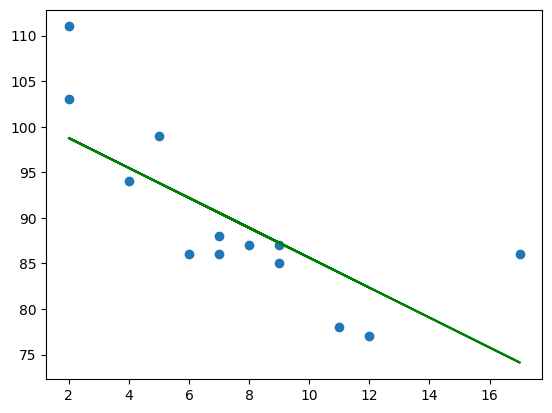

In [26]:
plt.scatter(x,y)
plt.plot(x,yp,c='g')
plt.show()

In [27]:
def sse(x,y,sl,inter):
    n=len(x)
    sum=0
    for i in range(n):
        yp=ypred(sl,inter,x[i])
        sum=sum+(yp-y[i])**2
    return sum

In [28]:
def varerr(y):
    ymean=np.mean(y)
    n=len(y)
    sum=0
    for i in range(n):
        sum=sum+(y[i]-ymean)**2
    return sum

In [29]:
def rsquared(x,y,slope,intercept):
    r=1-sse(x,y,slope,intercept)/ varerr(y)
    return r   

In [30]:
rsquared(x,y,sl,inter)

0.5725836702696371